In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anomaly-detection/Submission.csv
/kaggle/input/anomaly-detection/train.csv
/kaggle/input/anomaly-detection/test.csv


# Reading dataset

In [2]:
train=pd.read_csv("/kaggle/input/anomaly-detection/train.csv")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB
None


In [3]:
train.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


# Exploring data with visualization

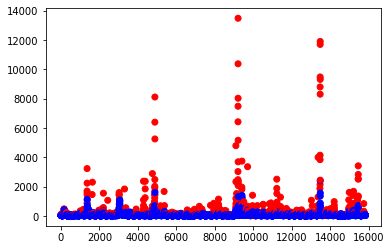

In [4]:
import matplotlib.pyplot as plt
#plt.scatter(trainDf['value'],trainDf[]['predicted'])
colors = np.where(train["is_anomaly"]==False,'b','r')
plt.scatter(range(15830),train['value'],c=colors)

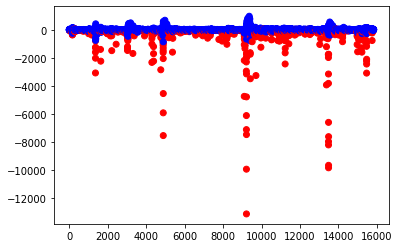

In [5]:
plt.scatter(range(15830),(train['predicted']-train['value']),c=colors)

In [6]:
train.sort_values('timestamp').head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [7]:
train.value_counts('value')

value
29       259
21       252
33       251
30       251
26       245
        ... 
543        1
241        1
237        1
554        1
13479      1
Length: 631, dtype: int64

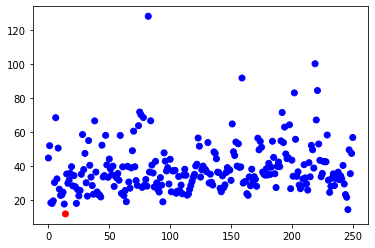

In [8]:
anomaly_column=[]
for i in range(15830):
    if train['value'][i]==30:
        if train['is_anomaly'][i]:
            anomaly_column.append('r')
        else:
            anomaly_column.append('b')
plt.scatter(range(251),train[train['value']==30]['predicted'],c=anomaly_column)

In [9]:
train[train['value']==30].head(85)

,timestamp,value,is_anomaly,predicted
31,1425017873,30,False,44.719856
36,1425019373,30,False,51.963814
85,1425034073,30,False,18.330496
89,1425035273,30,False,17.930708
91,1425035873,30,False,19.451230
...,...,...,...,...
4624,1426395773,30,False,32.028670
4708,1426420973,30,False,28.113440
5155,1426555073,30,False,128.268700
5214,1426572773,30,False,36.429480


In [10]:
train.value_counts('is_anomaly')

is_anomaly
False    15054
True       776
dtype: int64

In [11]:
train.head(10)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
5,1425010073,27,False,27.713638
6,1425010373,37,False,41.545710
7,1425010673,36,False,38.743620
8,1425010973,49,False,40.859787
9,1425011273,36,False,25.444733


In [12]:
train['value'].unique()

array([   42,    41,    61,    44,    27,    37,    36,    49,    32,
          50,    43,    47,    45,    56,    40,    57,    73,    59,
         140,    38,    28,    30,    31,    26,    20,    23,    15,
          25,    19,    18,    21,    17,    11,    13,    22,    14,
          16,    24,    29,    10,    39,    34,    35,    53,   222,
          46,   110,    65,    54,    66,   102,    92,    62,    86,
          67,    58,    52,    51,    68,   109,    80,   108,   172,
         271,   456,   440,   477,   426,   284,   159,   112,   118,
          70,    63,   105,    95,   111,   116,   155,   141,   115,
         137,   113,   136,   119,    97,   101,    96,    87,    93,
         103,    99,    90,   154,   131,   130,   100,   122,    89,
         106,   138,   123,   120,    88,   147,   129,    81,    85,
         114,    60,    91,    78,    74,    77,    83,    79,    76,
          98,   104,   117,   107,   204,   229,    82,     7,     9,
          12,     8,

In [13]:
train['value']-train['predicted']

0        -2.072500
1        -9.709390
2       -40.405120
3        21.049633
4         8.649840
           ...    
15825    -9.624115
15826   -14.752296
15827    -4.147630
15828   -32.007545
15829   -21.144700
Length: 15830, dtype: float64

In [14]:
train.corr()

,timestamp,value,is_anomaly,predicted
timestamp,1.000000,0.032628,0.016457,0.030462
value,0.032628,1.000000,0.324859,0.445180
is_anomaly,0.016457,0.324859,1.000000,0.059719
predicted,0.030462,0.445180,0.059719,1.000000


In [15]:
points=[]
y=[]
for i in range(15830):
    curr=[train['value'][i],abs(train['predicted'][i]-train['value'][i])]
    points.append(curr)
    if train['is_anomaly'][i]==False:
        y.append(0)
    else:
        y.append(1)

# Model creation and training

In [16]:
from sklearn import svm
# clf=svm.SVC(class_weight={0:4,1:95})
clf=svm.SVC(class_weight={0:0.52577388,1:10.19974227})
clf.fit(points,y)

SVC(class_weight={0: 0.52577388, 1: 10.19974227})

In [17]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

print("Class weights:", class_weights)

Class weights: [ 0.52577388 10.19974227]


In [18]:
clf.predict([[20,100],[140,65]])

array([1, 1])

# Model metrics

In [19]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, points, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.914


In [20]:
from sklearn.metrics import f1_score
print(f1_score(y,clf.predict(points)))

0.37767969735182855
